<a href="https://colab.research.google.com/github/KenDaupsey/One-Way-Repeated-measures-ANOVA/blob/main/One_Way_Repeated_measures_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** One-Way Repeated measures ANOVA ***

In [16]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/One-Way-Repeated-measures-ANOVA/main/Oneway%20Repeated%20Measures%20ANOVA%7Erb4.csv"
df = pd.read_csv(url)


In [18]:
df.columns

Index(['Unnamed: 0', 'y', 'a', 's'], dtype='object')

In [19]:
#One-way repeated measures ANOVA
from statsmodels.stats.anova import AnovaRM

# Assuming your data is stored in a DataFrame called df3
# Performing the repeated measures ANOVA
print(AnovaRM(data=df, depvar='y', subject='s', within=['a']).fit())

             Anova
  F Value Num DF  Den DF Pr > F
-------------------------------
a 11.6271 3.0000 21.0000 0.0001



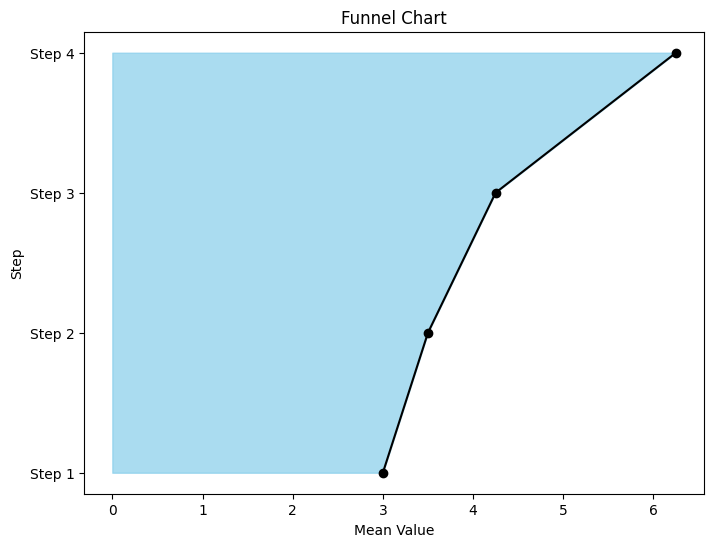

In [20]:
# Funnel Chart for the scenario:

# Create a DataFrame for the funnel chart
df_funnel = pd.DataFrame({
    'Step': ['Step 1', 'Step 2', 'Step 3', 'Step 4'],
    'Count': [
        df[df['a'] == 1]['y'].mean(),
        df[df['a'] == 2]['y'].mean(),
        df[df['a'] == 3]['y'].mean(),
        df[df['a'] == 4]['y'].mean()
    ]
})

# Plot the funnel chart
fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_betweenx(y=df_funnel['Step'], x1=0, x2=df_funnel['Count'], color='skyblue', alpha=0.7)
ax.plot(df_funnel['Count'], df_funnel['Step'], marker='o', color='black')

# Add labels and title
ax.set_xlabel('Mean Value')
ax.set_ylabel('Step')
ax.set_title('Funnel Chart')

plt.show()

In [21]:
# Funnel With Plotly:

import plotly.graph_objects as go
import pandas as pd

# Create a DataFrame for the funnel chart
df_funnel = pd.DataFrame({
    'Step': ['Step 1', 'Step 2', 'Step 3', 'Step 4'],
    'Count': [
        df[df['a'] == 1]['y'].mean(),
        df[df['a'] == 2]['y'].mean(),
        df[df['a'] == 3]['y'].mean(),
        df[df['a'] == 4]['y'].mean()
    ]
})

# Plot the funnel chart
fig = go.Figure(go.Funnel(
    y=df_funnel['Step'],
    x=df_funnel['Count']
))

# Update layout for better visualization
fig.update_layout(
    title="Funnel Chart",
    xaxis_title="Mean Value",
    yaxis_title="Step"
)

# Show the chart
fig.show()

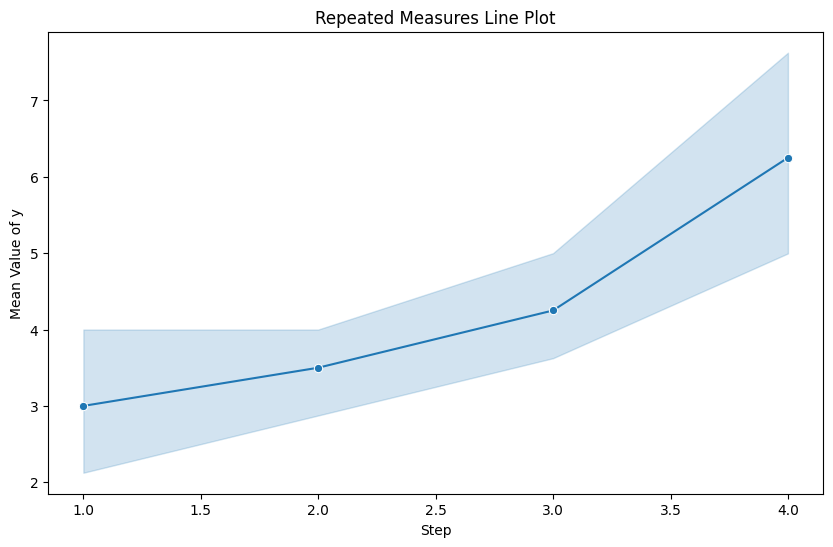

In [22]:
# Line plot of scenario using the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Create a repeated measures line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='a', y='y', data=df, err_style='band', marker='o')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Mean Value of y')
plt.title('Repeated Measures Line Plot')

plt.show()